In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final_cleaned_data.csv")
df

,Biomass,Type,Moisture content (% wb),"Initial avg. particle size, (mm)",In-feed Seive Size (mm),Volatile Matter (%),Ash (%),Energy content (MJ/kg),Grinder type,"Motor size, kW","Screen size, mm",Grinding Rate (Mg/h),Feed rate (g/s),"Sp. Grinding energy, kJ/kg",Final particle size (mm)
0,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Hammer mill,14.9,6.35,NaN,7.1,95.0,1.49
1,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Hammer mill,14.9,3.18,NaN,3.9,141.0,1.02
2,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Hammer mill,14.9,0.79,NaN,2.3,328.0,0.65
3,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Knife mill,3.7,6.35,NaN,3.0,153.0,2.66
4,Woody biomass,Douglas fir chips,13.0,10.36,NaN,NaN,NaN,NaN,Knife mill,3.7,4.76,NaN,2.3,205.0,1.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Agricultural residue,Corn stalk,14.0,40.00,NaN,NaN,NaN,NaN,Lab Mill,0.9,NaN,NaN,NaN,2310.0,NaN
311,Agricultural residue,Corn stalk,14.0,40.00,NaN,NaN,NaN,NaN,Lab Mill,0.9,NaN,NaN,NaN,1680.0,NaN
312,Agricultural residue,Corn stalk,14.0,40.00,NaN,NaN,NaN,NaN,Lab Mill,0.9,NaN,NaN,NaN,1440.0,NaN
313,Agricultural residue,Corn stalk,14.0,40.00,NaN,NaN,NaN,NaN,Lab Mill,0.9,NaN,NaN,NaN,1260.0,NaN


In [3]:
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_63103/197485208.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [15]:
df.isnull().sum()

Biomass                               0
Type                                  0
Moisture content (% wb)               0
Initial avg. particle size, (mm)    125
In-feed Seive Size (mm)             269
Volatile Matter (%)                 307
Ash (%)                             284
Energy content (MJ/kg)              284
Grinder type                          0
Motor size, kW                       10
Screen size, mm                      34
Grinding Rate (Mg/h)                291
Feed rate (g/s)                     215
Sp. Grinding energy, kJ/kg           11
Final particle size (mm)            102
dtype: int64

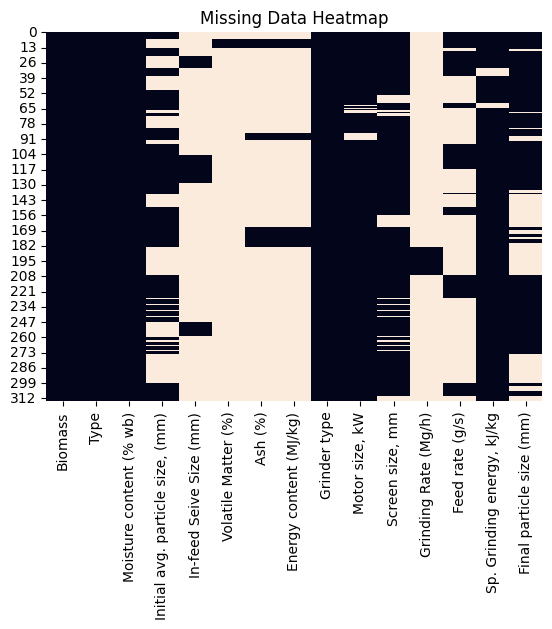

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


In [40]:
df[df["Grinder type"] == "TUB GRINDER"]

,Biomass,Type,Moisture content (% wb),"Initial avg. particle size, (mm)",In-feed Seive Size (mm),Volatile Matter (%),Ash (%),Energy content (MJ/kg),Grinder type,"Motor size, kW","Screen size, mm",Grinding Rate (Mg/h),Feed rate (g/s),"Sp. Grinding energy, kJ/kg",Final particle size (mm)


This time we're doing it again but properly and planned


1) Final Particle Size vs Screen Size


In [50]:
df.groupby("Grinder type")[["Screen size, mm", "Final particle size (mm)"]].count()

,"Screen size, mm",Final particle size (mm)
Grinder type,,
CHOPPER,0,8
HAMMER MILL,195,137
KNIFE MILL,62,60
LAB MILL,0,0
MEDALLION (TUB) GRINDER,4,0
RING ROLLER MILL,0,1
ROTOR IMPACT MILL,0,7
WHO (TUB) GRINDER,20,0


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_63103/3193716502.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_63103/3193716502.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


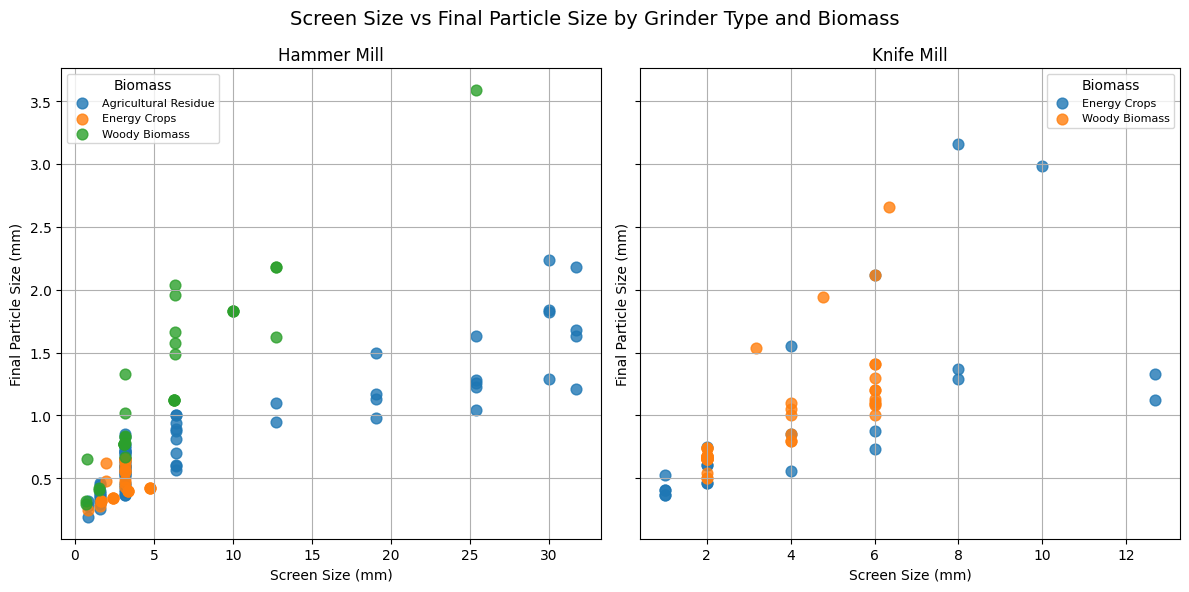

In [4]:
import matplotlib.pyplot as plt

# Drop missing values
plot_df = df.dropna(subset=["Screen size, mm", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize case (to avoid duplicates like "Hammer Mill" vs "HAMMER MILL")
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# Get unique grinder types
mills_to_plot = plot_df["Grinder type"].unique()
num_mills = len(mills_to_plot)

# Create subplots
fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]  # ensure iterable for single grinder type

# Plot for each grinder type
for ax, mill in zip(axes, mills_to_plot):
    sub_df_mill = plot_df[plot_df["Grinder type"] == mill]
    
    for biomass, sub_df in sub_df_mill.groupby("Biomass"):
        ax.scatter(
            sub_df["Screen size, mm"], 
            sub_df["Final particle size (mm)"],
            label=biomass,
            alpha=0.8,
            s=60
        )
    
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Screen Size (mm)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)
    ax.legend(title="Biomass", fontsize=8)

# Overall title
plt.suptitle("Screen Size vs Final Particle Size by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


In [52]:
df.groupby("Grinder type")[["Sp. Grinding energy, kJ/kg", "Final particle size (mm)"]].count()

,"Sp. Grinding energy, kJ/kg",Final particle size (mm)
Grinder type,,
CHOPPER,8,8
HAMMER MILL,197,137
KNIFE MILL,52,60
LAB MILL,15,0
MEDALLION (TUB) GRINDER,4,0
RING ROLLER MILL,1,1
ROTOR IMPACT MILL,7,7
WHO (TUB) GRINDER,20,0


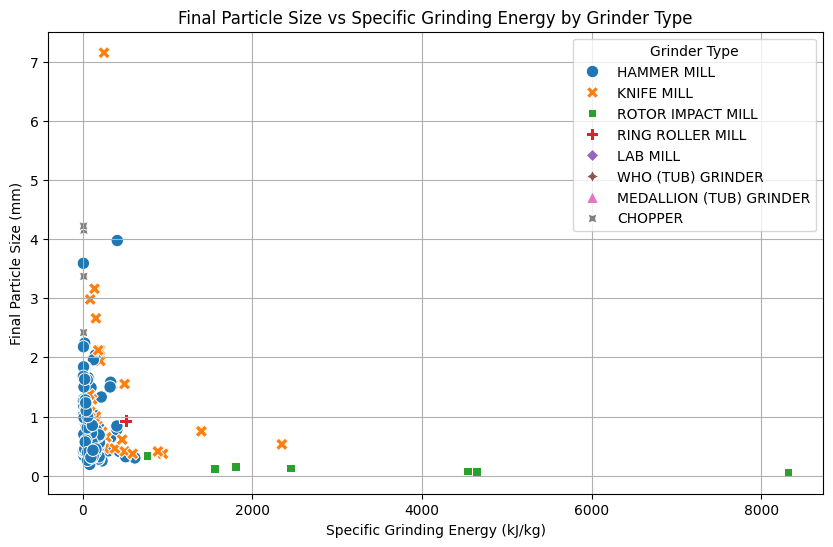

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x="Sp. Grinding energy, kJ/kg",
    y="Final particle size (mm)",
    hue="Grinder type",
    style="Grinder type",
    s=80
)


plt.xlabel("Specific Grinding Energy (kJ/kg)")
plt.ylabel("Final Particle Size (mm)")
plt.title("Final Particle Size vs Specific Grinding Energy by Grinder Type")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


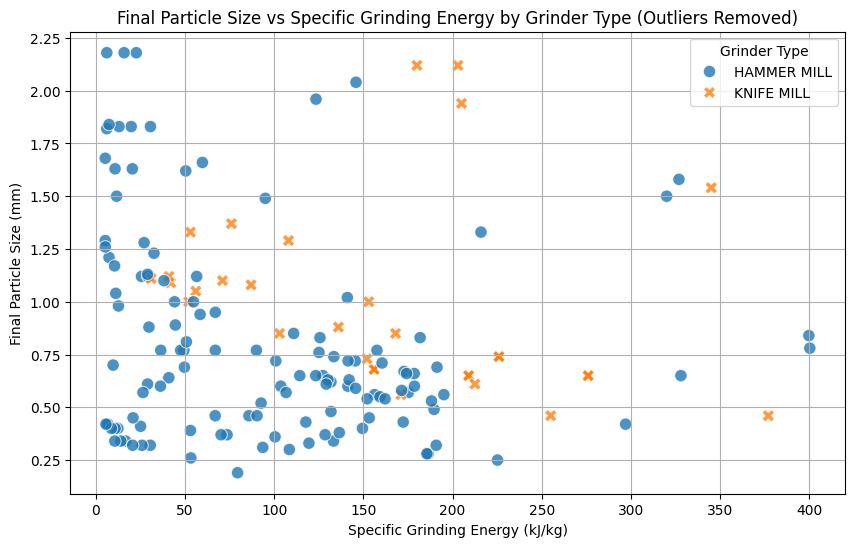

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Drop missing values in relevant columns
plot_df = df.dropna(subset=["Final particle size (mm)", "Sp. Grinding energy, kJ/kg", "Grinder type"])

# Remove outliers in both numeric columns
plot_df = remove_outliers_iqr(plot_df, "Sp. Grinding energy, kJ/kg")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Scatter Plot ---
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=plot_df,
    x="Sp. Grinding energy, kJ/kg",     # now on X-axis
    y="Final particle size (mm)",       # now on Y-axis
    hue="Grinder type",
    style="Grinder type",
    s=80,
    alpha=0.8
)

plt.xlabel("Specific Grinding Energy (kJ/kg)")
plt.ylabel("Final Particle Size (mm)")
plt.title("Final Particle Size vs Specific Grinding Energy by Grinder Type (Outliers Removed)")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1874332113.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1874332113.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


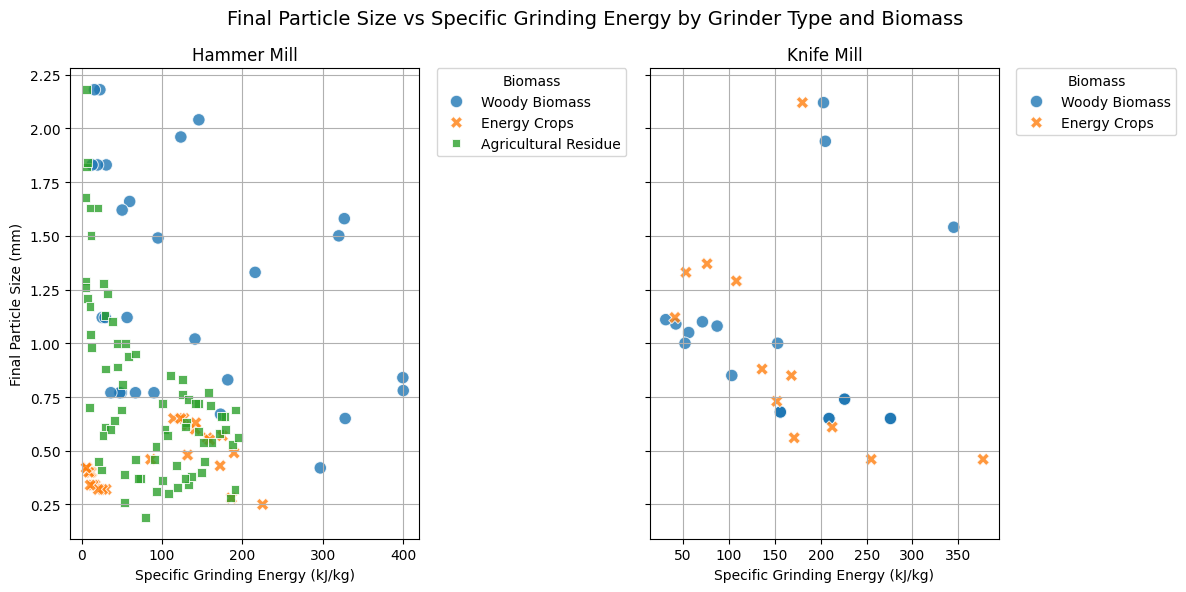

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# --- Data cleaning ---
plot_df = df.dropna(subset=["Final particle size (mm)", "Sp. Grinding energy, kJ/kg", "Grinder type", "Biomass"])

# Standardize case
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# Remove outliers
plot_df = remove_outliers_iqr(plot_df, "Sp. Grinding energy, kJ/kg")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)

# Ensure axes is iterable
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Sp. Grinding energy, kJ/kg",
        y="Final particle size (mm)",
        hue="Biomass",          # differentiate by biomass
        style="Biomass",        # different markers
        s=80,
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Specific Grinding Energy (kJ/kg)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)
    ax.legend(title="Biomass", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.suptitle("Final Particle Size vs Specific Grinding Energy by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2535395074.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2535395074.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


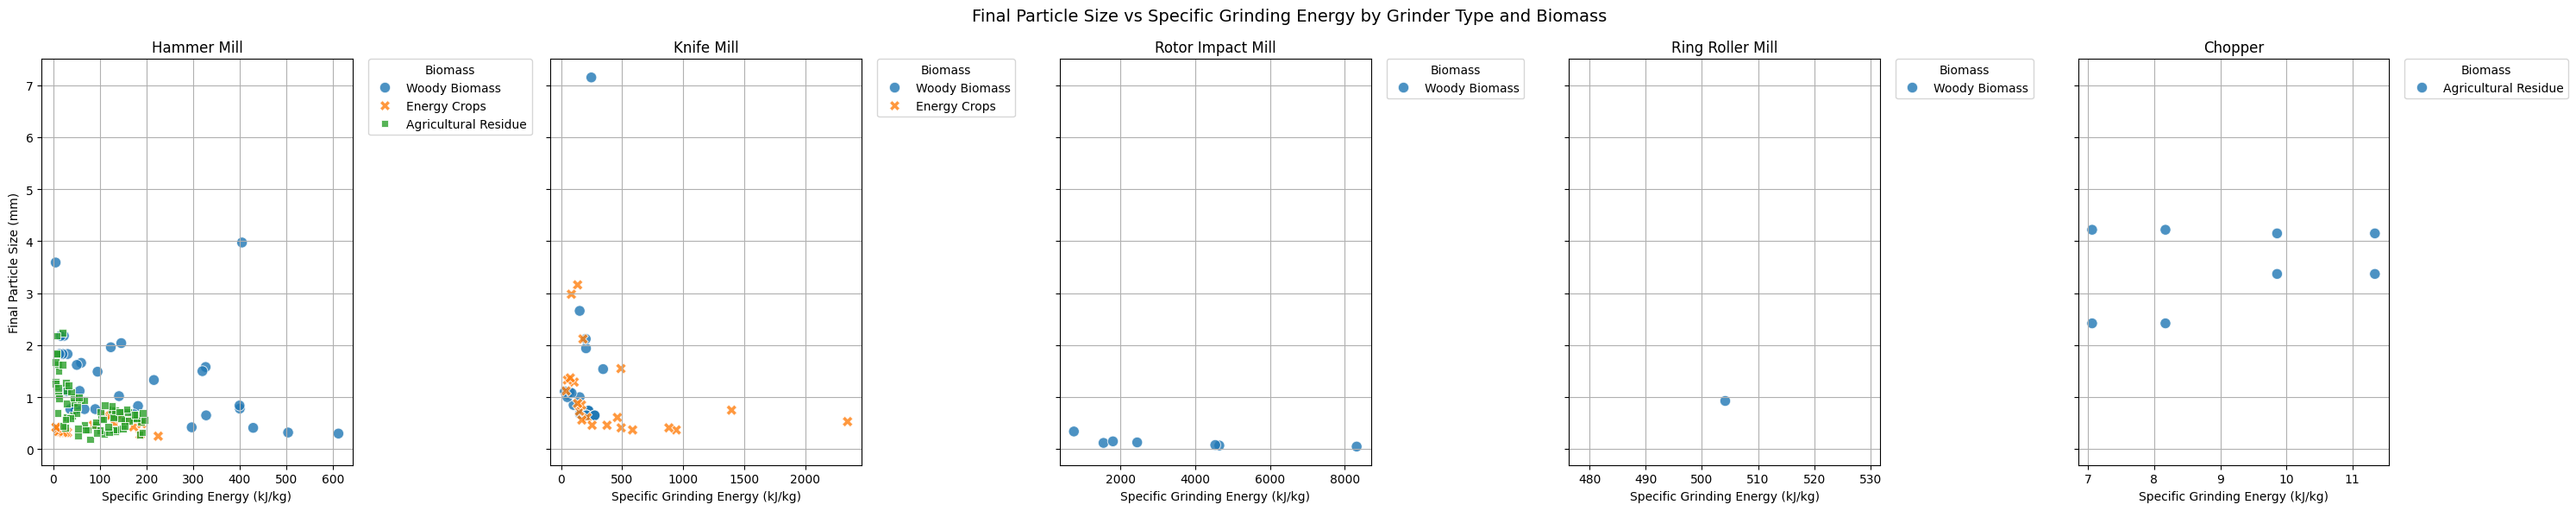

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Final particle size (mm)", "Sp. Grinding energy, kJ/kg", "Grinder type", "Biomass"])

# Standardize case
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)

# Ensure axes is iterable
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Sp. Grinding energy, kJ/kg",
        y="Final particle size (mm)",
        hue="Biomass",          # differentiate by biomass
        style="Biomass",        # different markers
        s=80,
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Specific Grinding Energy (kJ/kg)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)
    ax.legend(title="Biomass", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.suptitle("Final Particle Size vs Specific Grinding Energy by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


In [53]:
df.groupby("Grinder type")[["Moisture content (% wb)", "Final particle size (mm)"]].count()

,Moisture content (% wb),Final particle size (mm)
Grinder type,,
CHOPPER,8,8
HAMMER MILL,197,137
KNIFE MILL,63,60
LAB MILL,15,0
MEDALLION (TUB) GRINDER,4,0
RING ROLLER MILL,1,1
ROTOR IMPACT MILL,7,7
WHO (TUB) GRINDER,20,0


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/3069871566.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/3069871566.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


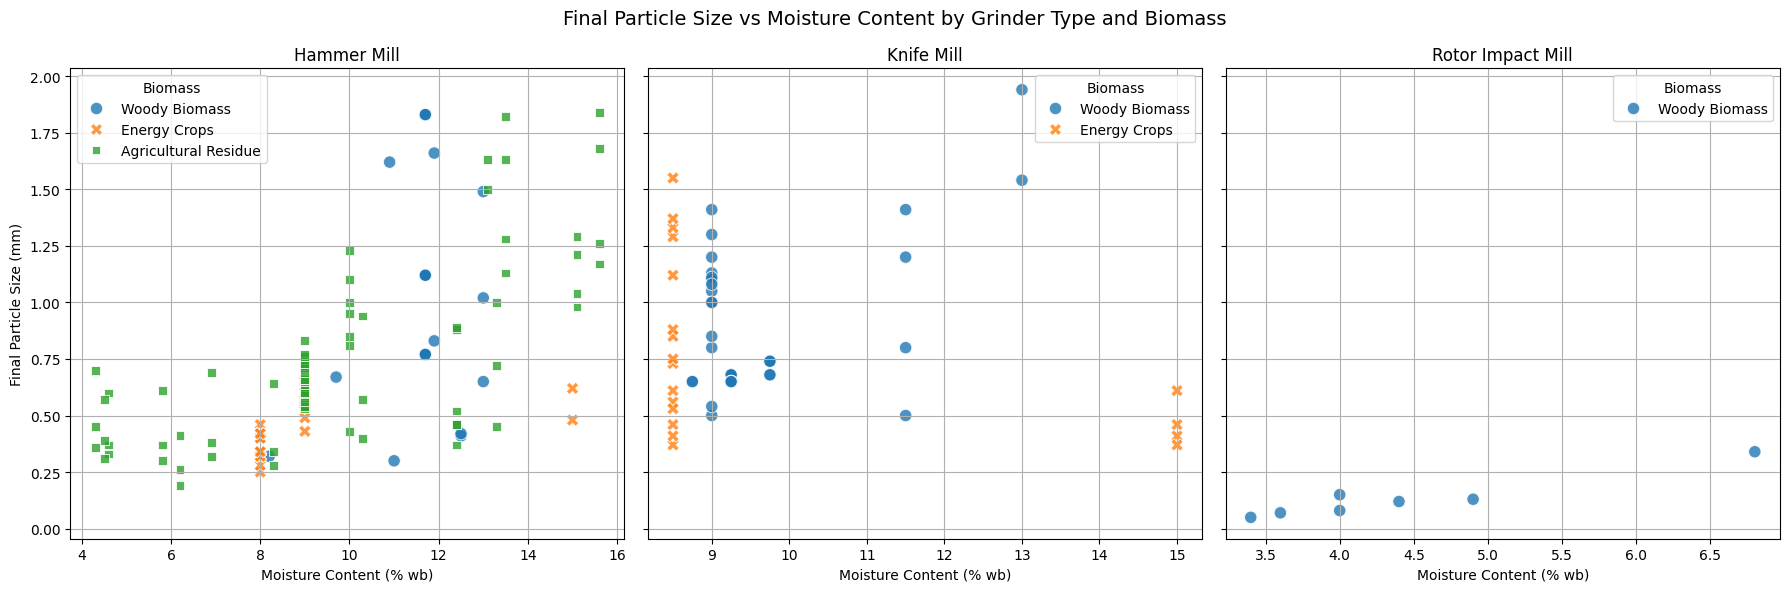

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# --- Data cleaning ---
plot_df = df.dropna(subset=["Final particle size (mm)", "Moisture content (% wb)", "Grinder type", "Biomass"])

# Standardize text
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# Remove outliers
plot_df = remove_outliers_iqr(plot_df, "Moisture content (% wb)")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type with legends ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Moisture content (% wb)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True  # keep legend for each subplot
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Moisture Content (% wb)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Moisture Content by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/261913054.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/261913054.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


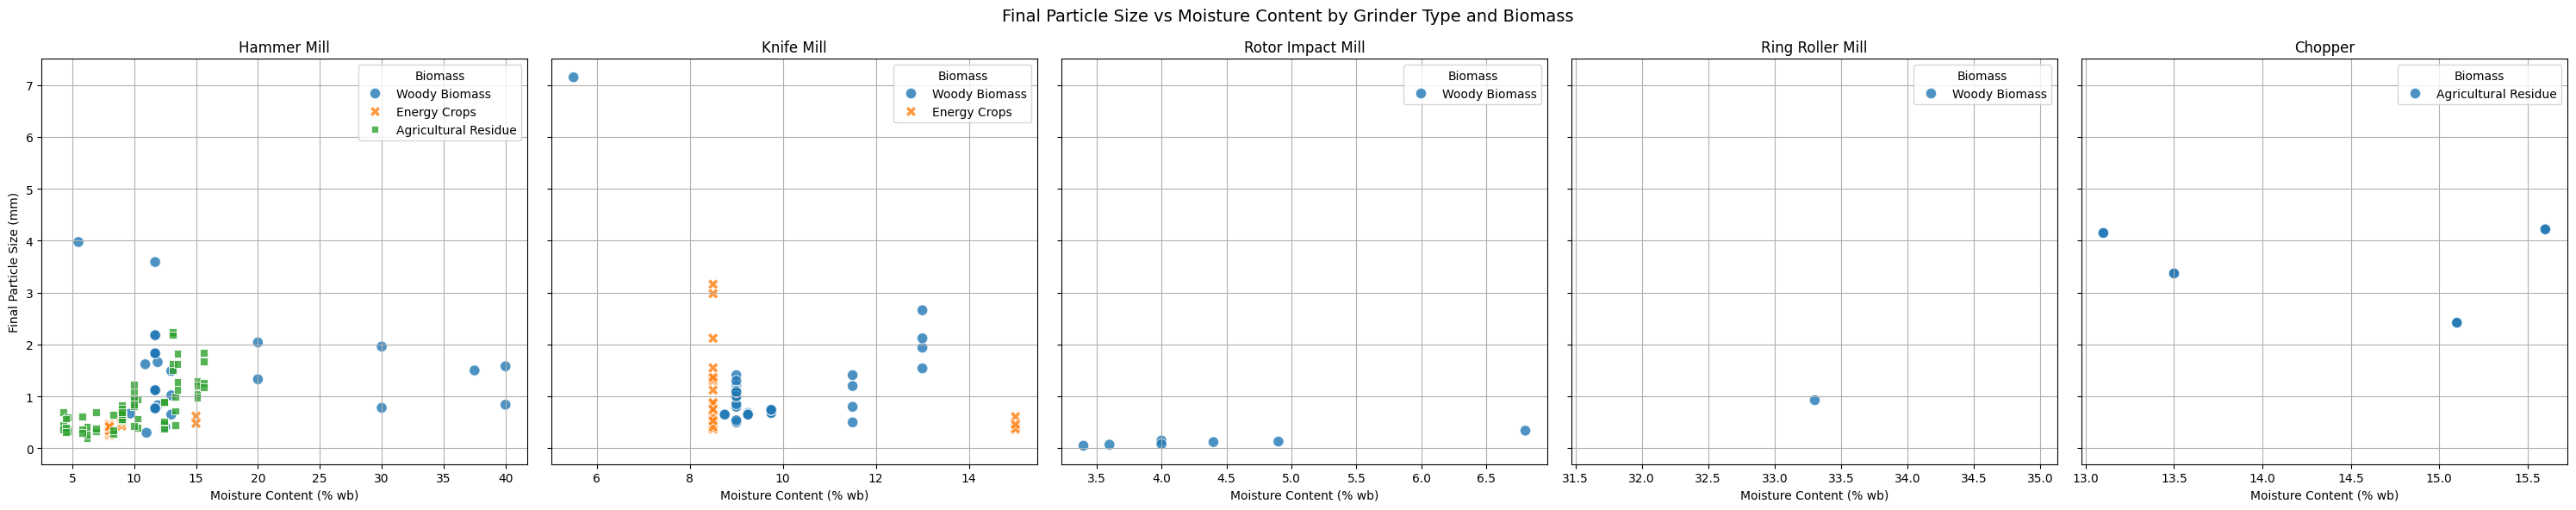

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Final particle size (mm)", "Moisture content (% wb)", "Grinder type", "Biomass"])

# Standardize text
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type with legends ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Moisture content (% wb)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Moisture Content (% wb)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Moisture Content by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


In [54]:
df.groupby("Grinder type")[["Initial avg. particle size, (mm)", "Final particle size (mm)"]].count()

,"Initial avg. particle size, (mm)",Final particle size (mm)
Grinder type,,
CHOPPER,0,8
HAMMER MILL,129,137
KNIFE MILL,38,60
LAB MILL,15,0
MEDALLION (TUB) GRINDER,0,0
RING ROLLER MILL,1,1
ROTOR IMPACT MILL,7,7
WHO (TUB) GRINDER,0,0


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2142861864.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2142861864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


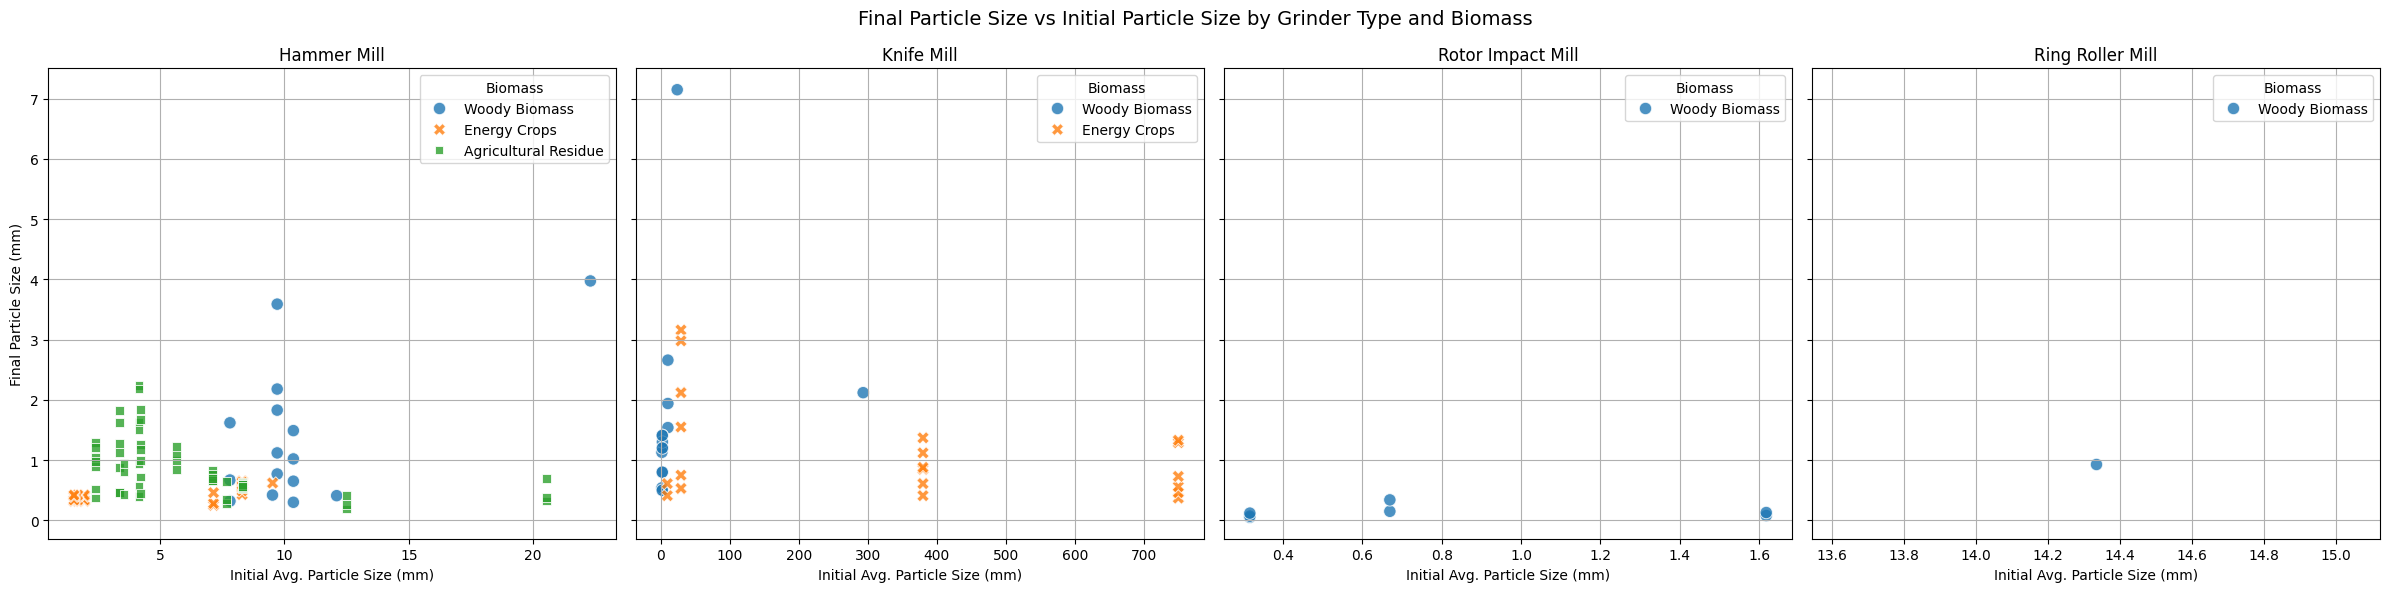

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Initial avg. particle size, (mm)", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type with legends ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Initial avg. particle size, (mm)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Initial Avg. Particle Size (mm)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Initial Particle Size by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


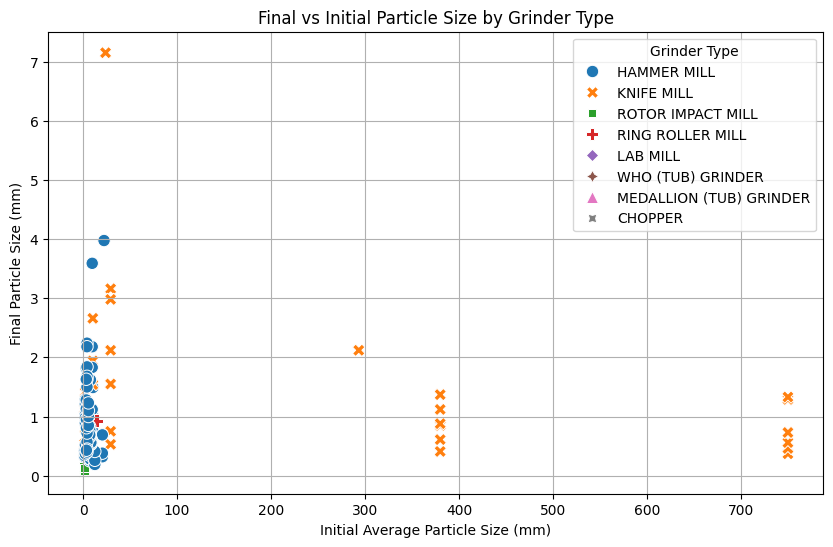

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Initial avg. particle size, (mm)",
    y="Final particle size (mm)",
    hue="Grinder type",
    style="Grinder type",
    s=80
)

plt.xlabel("Initial Average Particle Size (mm)")
plt.ylabel("Final Particle Size (mm)")
plt.title("Final vs Initial Particle Size by Grinder Type")
plt.legend(title="Grinder Type")
plt.grid(True)
plt.show()


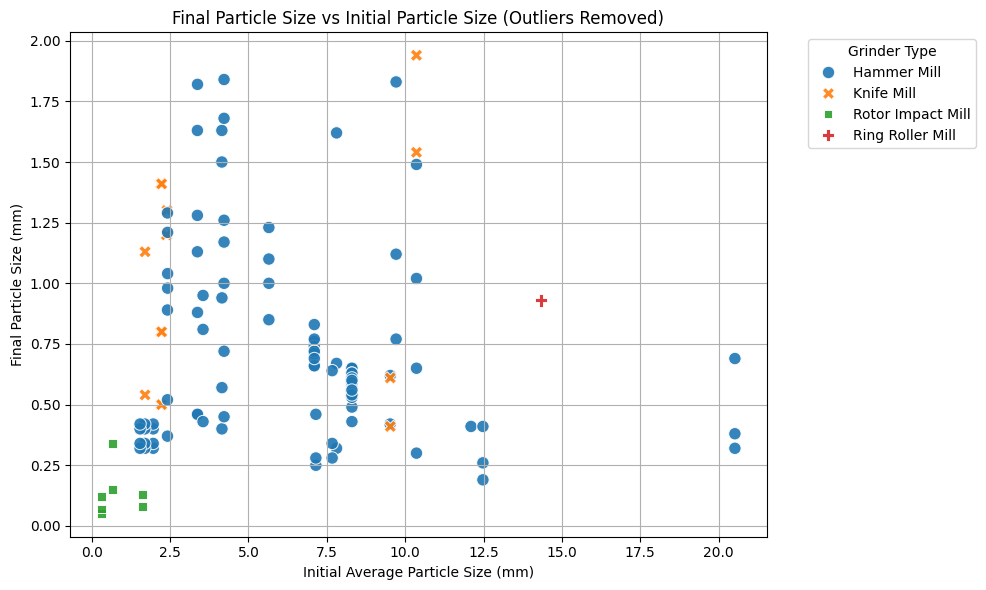

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Function to remove outliers using IQR ---
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        if col in cleaned_df.columns:
            Q1 = cleaned_df[col].quantile(0.25)
            Q3 = cleaned_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
    return cleaned_df

# --- Clean and standardize ---
numeric_cols = ["Initial avg. particle size, (mm)", "Final particle size (mm)"]
df_clean = remove_outliers_iqr(df, numeric_cols)

# Standardize Grinder Type labels
df_clean["Grinder type"] = df_clean["Grinder type"].str.strip().str.title()

# --- Plot: Final vs Initial Particle Size ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x="Initial avg. particle size, (mm)",
    y="Final particle size (mm)",
    hue="Grinder type",
    style="Grinder type",
    s=80,
    alpha=0.9
)

plt.xlabel("Initial Average Particle Size (mm)")
plt.ylabel("Final Particle Size (mm)")
plt.title("Final Particle Size vs Initial Particle Size (Outliers Removed)")
plt.legend(title="Grinder Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/641309659.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/641309659.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


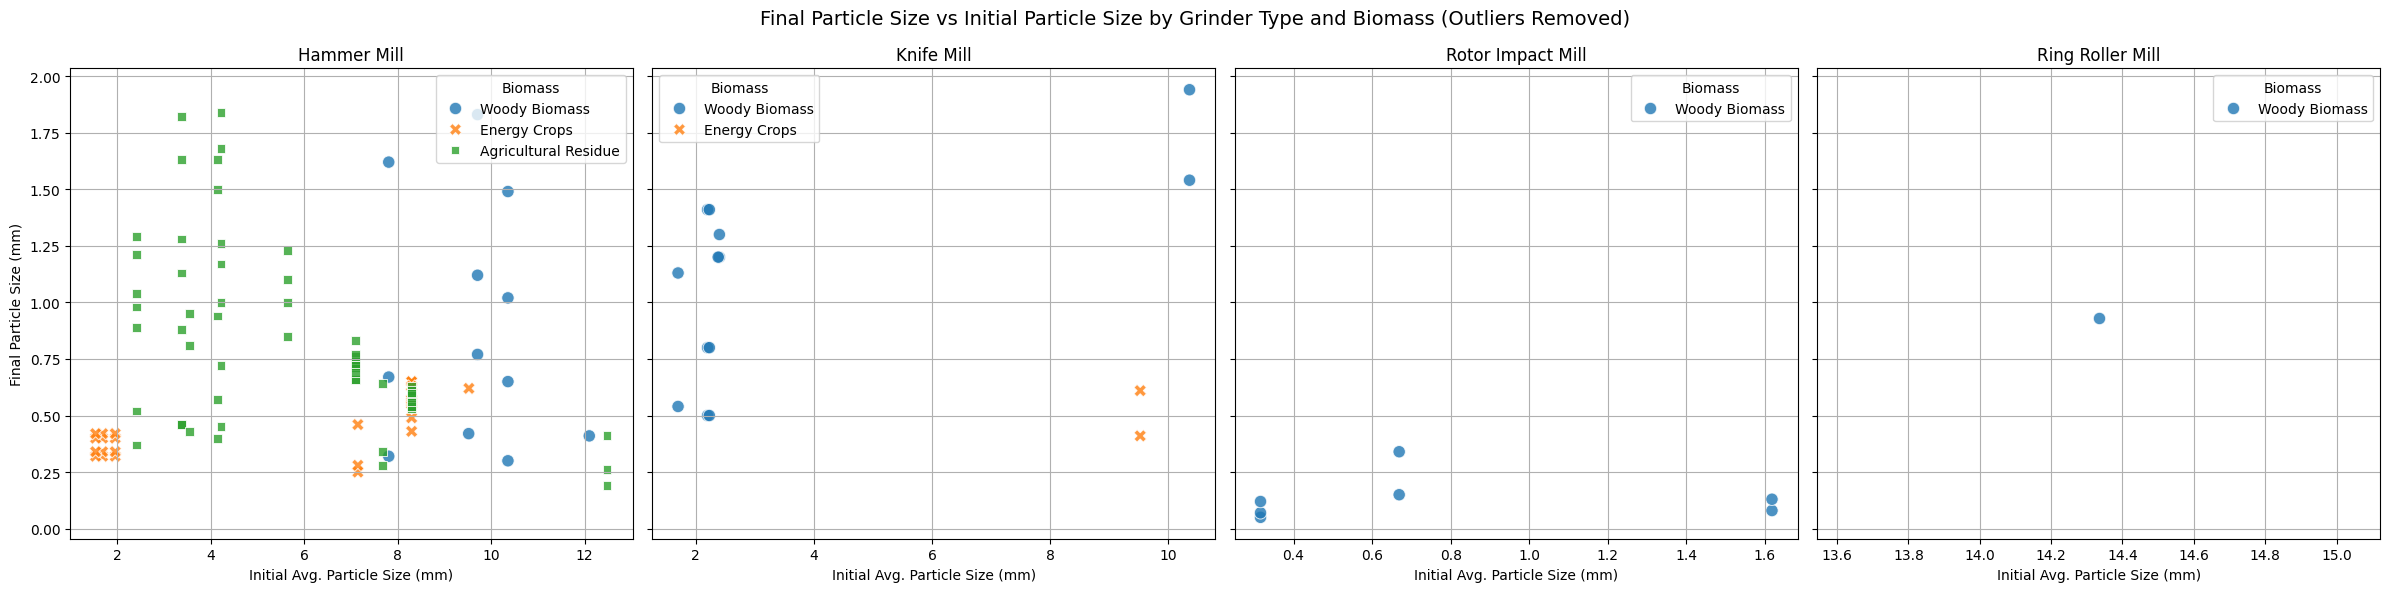

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Outlier removal function ---
def remove_outliers_iqr(data, col):
    """Remove outliers from a column using the IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# --- Data cleaning ---
plot_df = df.dropna(subset=[
    "Initial avg. particle size, (mm)",
    "Final particle size (mm)",
    "Grinder type",
    "Biomass"
])

# Standardize text
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Remove outliers from both numeric columns ---
plot_df = remove_outliers_iqr(plot_df, "Initial avg. particle size, (mm)")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type with legends ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Initial avg. particle size, (mm)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Initial Avg. Particle Size (mm)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Initial Particle Size by Grinder Type and Biomass (Outliers Removed)", fontsize=14)
plt.tight_layout()
plt.show()


In [59]:
df.groupby("Grinder type")[["Feed rate (g/s)", "Final particle size (mm)"]].count()

,Feed rate (g/s),Final particle size (mm)
Grinder type,,
CHOPPER,0,8
HAMMER MILL,86,137
KNIFE MILL,14,60
LAB MILL,0,0
MEDALLION (TUB) GRINDER,0,0
RING ROLLER MILL,0,1
ROTOR IMPACT MILL,0,7
WHO (TUB) GRINDER,0,0


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2923743799.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/2923743799.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


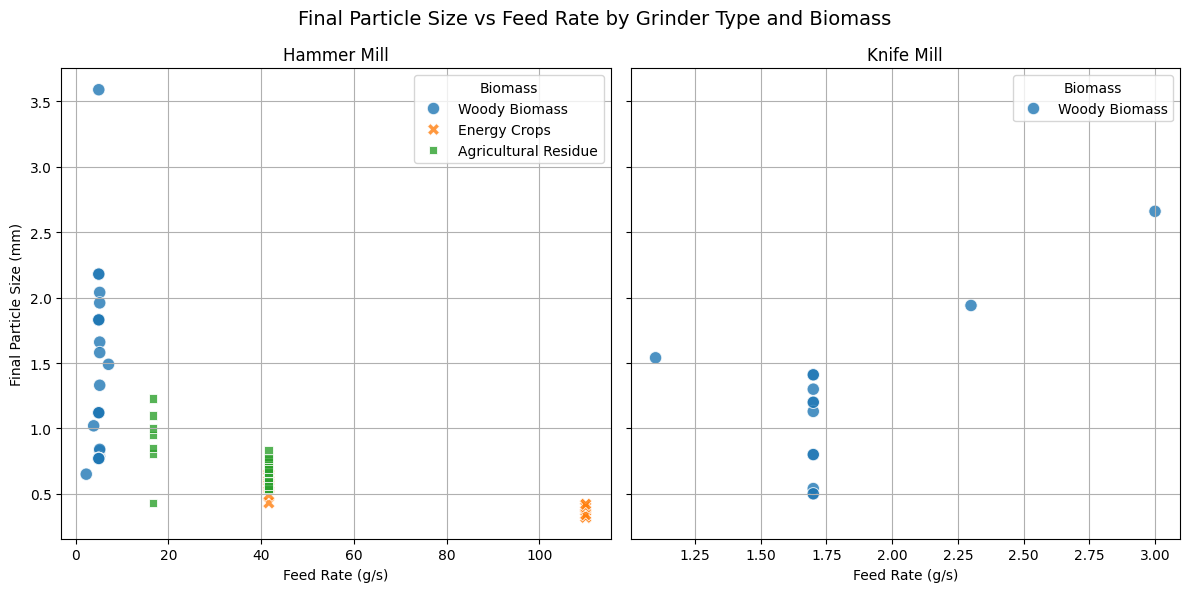

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Feed rate (g/s)", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text columns
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Feed rate (g/s)",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Feed Rate (g/s)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Feed Rate by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


In [60]:
df.groupby("Grinder type")[["Motor size, kW", "Final particle size (mm)"]].count()

,"Motor size, kW",Final particle size (mm)
Grinder type,,
CHOPPER,8,8
HAMMER MILL,190,137
KNIFE MILL,60,60
LAB MILL,15,0
MEDALLION (TUB) GRINDER,4,0
RING ROLLER MILL,1,1
ROTOR IMPACT MILL,7,7
WHO (TUB) GRINDER,20,0


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1839197555.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1839197555.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


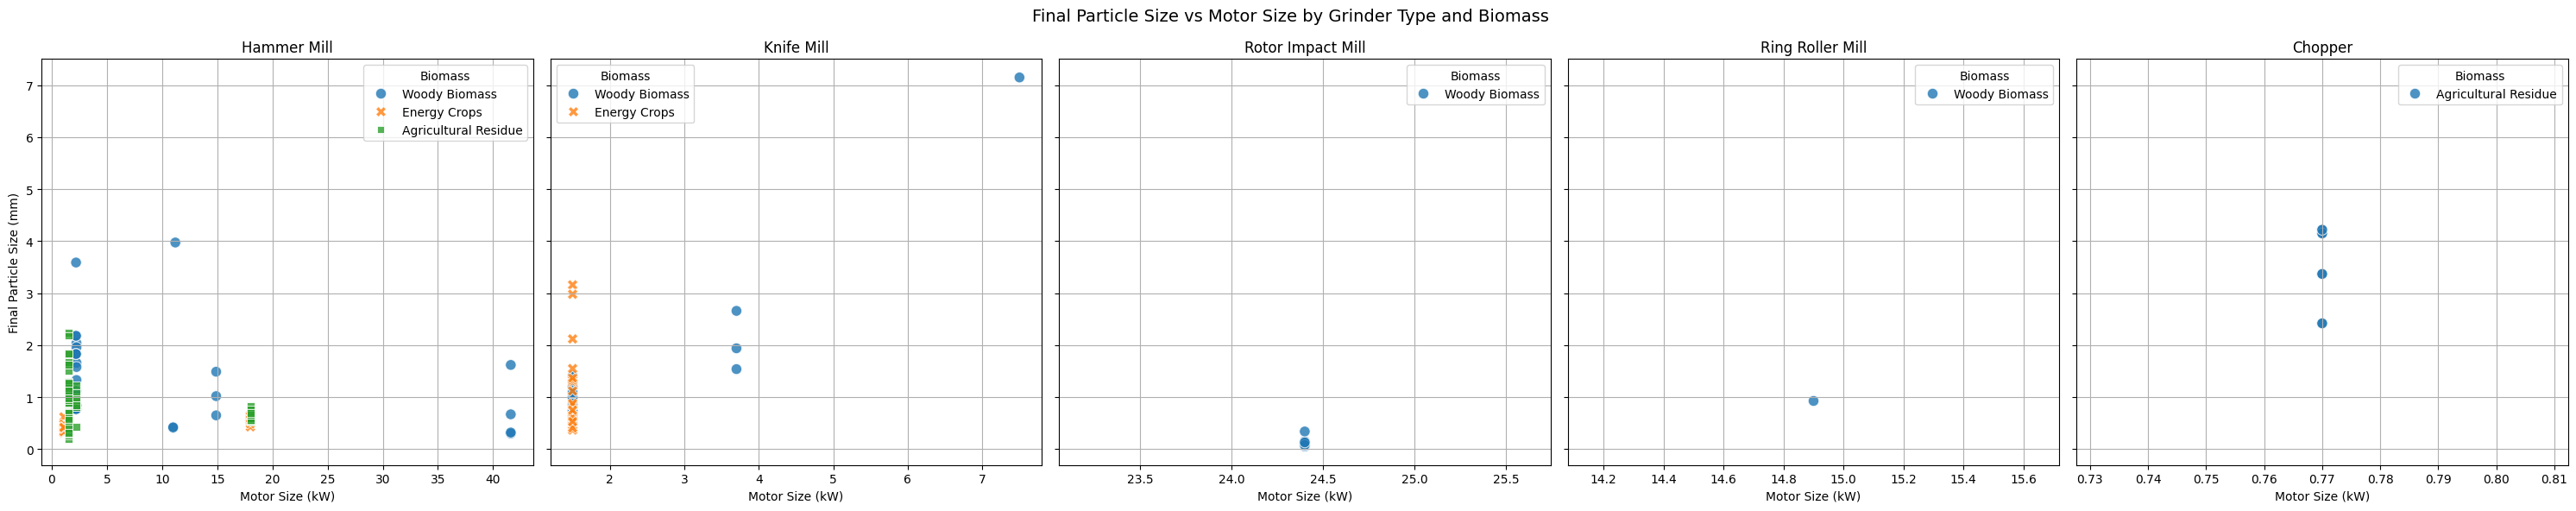

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Motor size, kW", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text columns
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Motor size, kW",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Motor Size (kW)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Motor Size by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/354731899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/354731899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


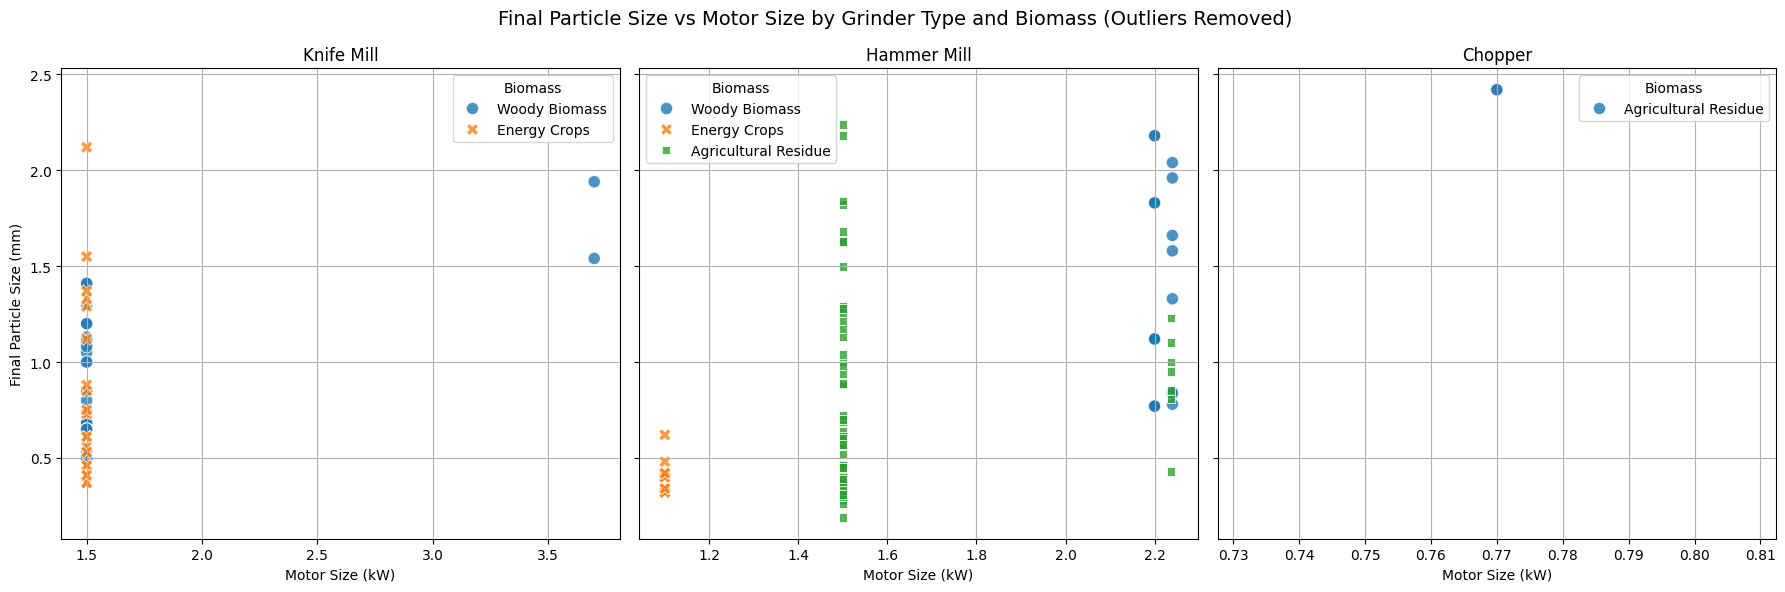

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Motor size, kW", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text columns
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Outlier removal using IQR method ---
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Remove outliers for both columns
plot_df = remove_outliers_iqr(plot_df, "Motor size, kW")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Motor size, kW",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.8,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Motor Size (kW)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Motor Size by Grinder Type and Biomass (Outliers Removed)", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1527613217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_23342/1527613217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


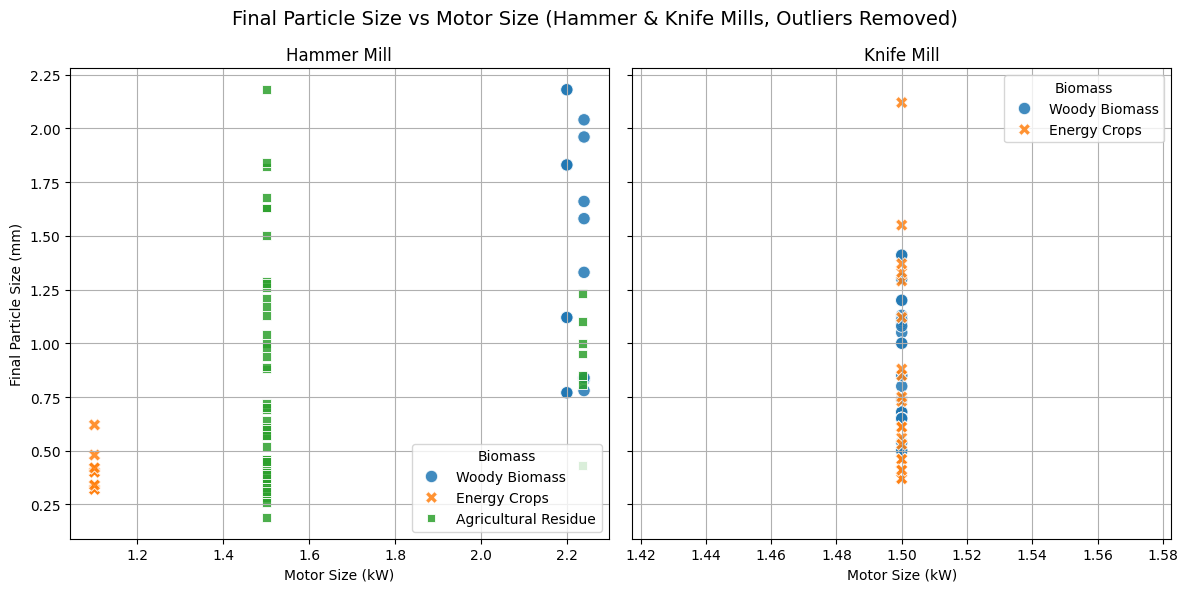

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data cleaning ---
plot_df = df.dropna(subset=["Motor size, kW", "Final particle size (mm)", "Grinder type", "Biomass"])

# Standardize text columns
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Filter only Hammer Mill and Knife Mill ---
plot_df = plot_df[plot_df["Grinder type"].isin(["Hammer Mill", "Knife Mill"])]

# --- Outlier removal using IQR method ---
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Remove outliers for both numeric columns
plot_df = remove_outliers_iqr(plot_df, "Motor size, kW")
plot_df = remove_outliers_iqr(plot_df, "Final particle size (mm)")

# --- Create subplots per Grinder Type ---
mills = plot_df["Grinder type"].unique()
num_mills = len(mills)

fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills):
    sub_df = plot_df[plot_df["Grinder type"] == mill]
    sns.scatterplot(
        data=sub_df,
        x="Motor size, kW",
        y="Final particle size (mm)",
        hue="Biomass",
        style="Biomass",
        s=80,
        alpha=0.85,
        ax=ax,
        legend=True
    )
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Motor Size (kW)")
    ax.set_ylabel("Final Particle Size (mm)")
    ax.grid(True)

plt.suptitle("Final Particle Size vs Motor Size (Hammer & Knife Mills, Outliers Removed)", fontsize=14)
plt.tight_layout()
plt.show()


Now we study all about Grinding Energy against different Parameters


/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_63103/1726523362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
/var/folders/vz/krwsg4353vl48qkpv_1q8gp80000gn/T/ipykernel_63103/1726523362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()


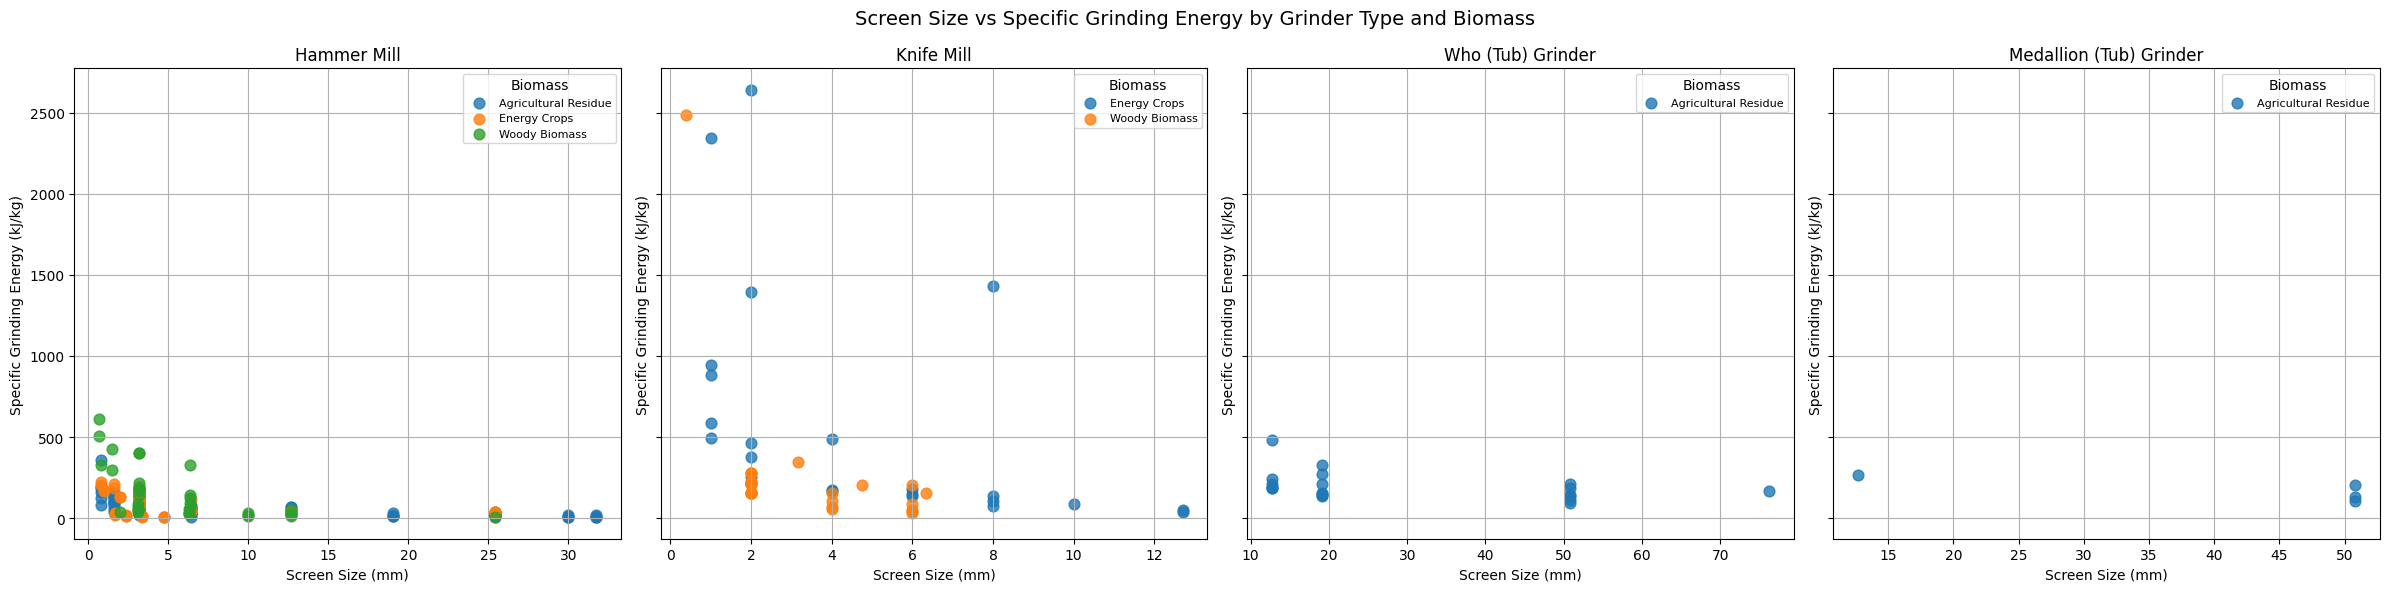

In [5]:
import matplotlib.pyplot as plt

# --- Drop missing values for relevant columns ---
plot_df = df.dropna(subset=["Screen size, mm", "Sp. Grinding energy, kJ/kg", "Grinder type", "Biomass"])

# --- Standardize text to avoid duplicates like 'HAMMER MILL' vs 'Hammer Mill' ---
plot_df["Grinder type"] = plot_df["Grinder type"].str.strip().str.title()
plot_df["Biomass"] = plot_df["Biomass"].str.strip().str.title()

# --- Get unique grinder types ---
mills_to_plot = plot_df["Grinder type"].unique()
num_mills = len(mills_to_plot)

# --- Create subplots ---
fig, axes = plt.subplots(1, num_mills, figsize=(6*num_mills, 6), sharey=True)
if num_mills == 1:
    axes = [axes]  # ensure iterable for single grinder type

# --- Plot for each grinder type ---
for ax, mill in zip(axes, mills_to_plot):
    sub_df_mill = plot_df[plot_df["Grinder type"] == mill]
    
    for biomass, sub_df in sub_df_mill.groupby("Biomass"):
        ax.scatter(
            sub_df["Screen size, mm"], 
            sub_df["Sp. Grinding energy, kJ/kg"],
            label=biomass,
            alpha=0.8,
            s=60
        )
    
    ax.set_title(f"{mill}", fontsize=12)
    ax.set_xlabel("Screen Size (mm)")
    ax.set_ylabel("Specific Grinding Energy (kJ/kg)")
    ax.grid(True)
    ax.legend(title="Biomass", fontsize=8)

# --- Overall title ---
plt.suptitle("Screen Size vs Specific Grinding Energy by Grinder Type and Biomass", fontsize=14)
plt.tight_layout()
plt.show()
